<a href="https://colab.research.google.com/github/anubhavmaity/StableDiffusion-from-foundation/blob/main/nbs/01_matmul_notmnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Matrix multiplication from foundations

The foundations we will assume throughout this course are
- Python
- matplotlib
- The python standard library
- Jupyter notebooks and nbdev

In [ ]:
# !pip install deeplake

In [ ]:
from pathlib import Path
import pickle, gzip, math, os, time, shutil, matplotlib as mpl, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import random

## What is not-MNIST?

The not-MNIST dataset comprises of some freely accessible fonts and symbols extracted to create a dataset similar to MNIST. The dataset is divided into two parts: a relatively small hand-cleaned portion of approximately 19k samples and a larger uncleaned portion of 500k samples. There are ten classes, with letters A-J drawn from various fonts. Here we will use the hand-cleaned portion

    1. A
    
    2. B
    
    3. C
    
    4. D
    
    5. E
    
    6. F
    
    7. G
    
    8. H
    
    9. I
    
    10. J
    

## Get data

In [ ]:
import deeplake
ds = deeplake.load('hub://activeloop/not-mnist-small')

/Users/anubhavmaity/mambaforge/envs/fastai/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/anubhavmaity/mambaforge/envs/fastai/lib/python3.9/site-packages/deeplake/util/check_latest_version.py:32: UserWarning: A newer version of deeplake (3.8.8) is available. It's recommended that you update to the latest version using `pip install -U deeplake`.
  warnings.warn(
/

Opening dataset in read-only mode as you don't have write permissions.


-

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/not-mnist-small



|

hub://activeloop/not-mnist-small loaded successfully.



In [ ]:
images = ds.tensors['images'].numpy().astype('float32') / 255.
labels = ds.tensors['labels'].numpy().astype(int)

In [ ]:
images.shape

(18724, 28, 28)

In [ ]:
labels.shape

(18724, 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=1)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14979, 28, 28), (3745, 28, 28), (14979, 1), (3745, 1))

<matplotlib.image.AxesImage>

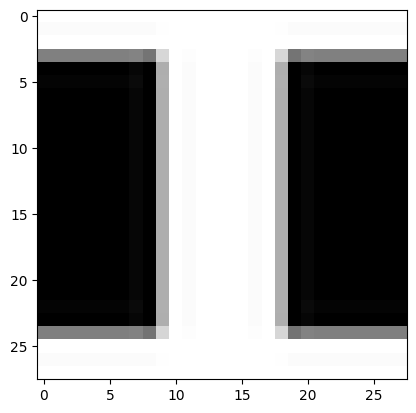

In [ ]:
plt.imshow(X_train[0], cmap='gray')

In [ ]:
y_train = y_train.squeeze(-1)
y_test = y_test.squeeze(-1)

In [ ]:
def char(y): return 'ABCDEFGHIJ'[y]

In [ ]:
char(y_train[0])

'I'

In [ ]:
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

In [ ]:
X_train.shape, X_test.shape

((14979, 784), (3745, 784))

In [ ]:
lst1 = list(X_train[0])
vals = lst1[290: 300]
vals

[1.0, 0.9843137, 1.0, 1.0, 1.0, 1.0, 0.9843137, 1.0, 0.68235296, 0.0]

In [ ]:
def chunks(x, sz):
    for i in range(0, len(x), sz): yield x[i: i + sz]

In [ ]:
list(chunks(vals, 5))

[[1.0, 0.9843137, 1.0, 1.0, 1.0], [1.0, 0.9843137, 1.0, 0.68235296, 0.0]]

In [ ]:
val_iter = chunks(vals, 5)

In [ ]:
next(val_iter)

[1.0, 0.9843137, 1.0, 1.0, 1.0]

In [ ]:
next(val_iter)

[1.0, 0.9843137, 1.0, 0.68235296, 0.0]

In [ ]:
next(val_iter)

StopIteration: 

<matplotlib.image.AxesImage>

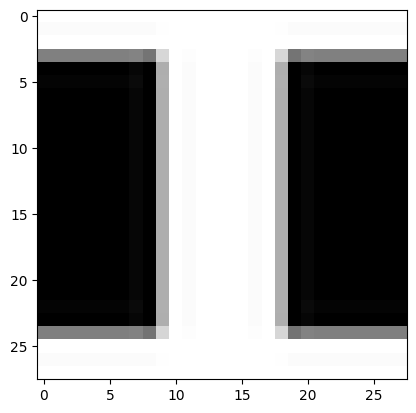

In [ ]:
plt.imshow(list(chunks(lst1, 28)), cmap='gray')

In [ ]:
from itertools import islice

In [ ]:
it = iter(vals)
islice(it, 5)

<itertools.islice>

In [ ]:
list(islice(it, 5))

[1.0, 0.9843137, 1.0, 1.0, 1.0]

In [ ]:
for i in islice(it, 5):
    print(i)

1.0
0.9843137
1.0
0.68235296
0.0


In [ ]:
it = iter(lst1)
img = list(iter(lambda : list(islice(it, 28)), []))

<matplotlib.image.AxesImage>

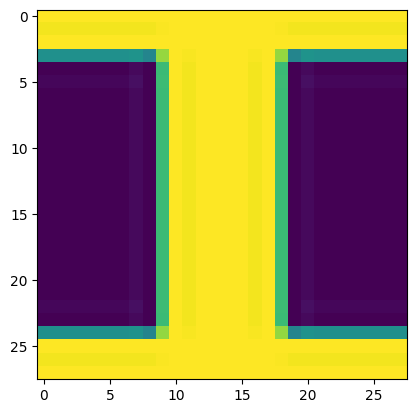

In [ ]:
plt.imshow(img)

## Matrix and Tensor

In [ ]:
img[20][15]

1.0

In [ ]:
class Matrix:
    def __init__(self, xs): self.xs = xs
    def __getitem__(self, idxs): return self.xs[idxs[0]][idxs[1]]

In [ ]:
m = Matrix(img)
m[20, 15]

1.0

In [ ]:
import torch
from torch import tensor

In [ ]:
tensor([1, 2, 3])

tensor([1, 2, 3])

In [ ]:
tens = tensor(img); tens[20, 15]

tensor(1.)

In [ ]:
X_train, y_train, X_test, y_test = map(tensor, (X_train, y_train, X_test, y_test))

In [ ]:
X_train.type()

'torch.FloatTensor'

In [ ]:
X_train.shape

torch.Size([14979, 784])

In [ ]:
imgs = X_train.reshape((-1, 28, 28))
imgs.shape

torch.Size([14979, 28, 28])

<matplotlib.image.AxesImage>

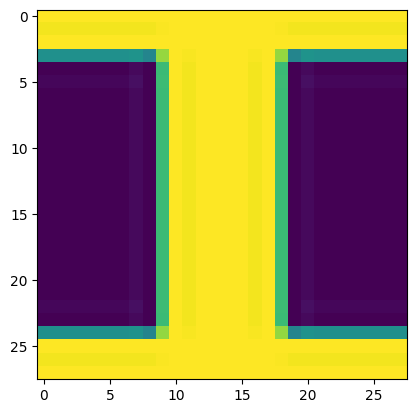

In [ ]:
plt.imshow(imgs[0])

## Random numbers

In [ ]:
rnd_state = None
def seed(a):
    global rnd_state
    a, x = divmod(a, 30268)
    a, y = divmod(a, 30306)
    a, z = divmod(a, 30322)

    rnd_state = int(x) + 1, int(y) + 1, int(z) + 1

In [ ]:
seed(457428938475)

In [ ]:
rnd_state

(4976, 20238, 499)

In [ ]:
def rand():
    global rnd_state
    x, y, z = rnd_state
    x = (171 * x) % 30269
    y = (172 * y) % 30307
    z = (170 * z) % 30323
    rnd_state = x, y, z
    return (x / 30269 + y / 30307 + z / 30323) % 1.0

In [ ]:
rand(), rand(), rand()

(0.7645251082582081, 0.7920889799553945, 0.06912886811267205)

In [ ]:
if os.fork(): print(f'In parent: {rand()}')
else:
    print(f'In child: {rand()}')
    os._exit(os.EX_OK)

In parent: 0.9559050644103264
In child: 0.9559050644103264


In [ ]:
if os.fork(): print(f'In parent: {torch.rand(1)}')
else:
    print(f'In child: {torch.rand(1)}')
    os._exit(os.EX_OK)

In parent: tensor([0.2509])
In child: tensor([0.2509])


In [ ]:
if os.fork(): print(f'In parent: {random.random()}')
else:
    print(f'In child: {random.random()}')
    os._exit(os.EX_OK)

In parent: 0.8444218515250481
In child: 0.6555418112808392


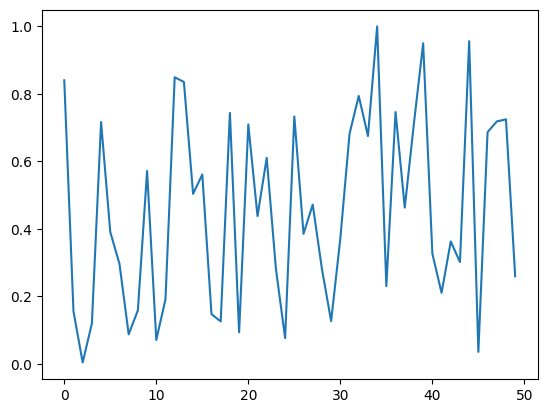

In [ ]:
plt.plot([rand() for _ in range(50)]);

(array([10045.,  9990.,  9701., 10008.,  9934.,  9935., 10182., 10210.,
         9924., 10071.]),
 array([3.03151161e-06, 1.00002109e-01, 2.00001186e-01, 3.00000263e-01,
        3.99999341e-01, 4.99998418e-01, 5.99997495e-01, 6.99996572e-01,
        7.99995650e-01, 8.99994727e-01, 9.99993804e-01]),
 <BarContainer object of 10 artists>)

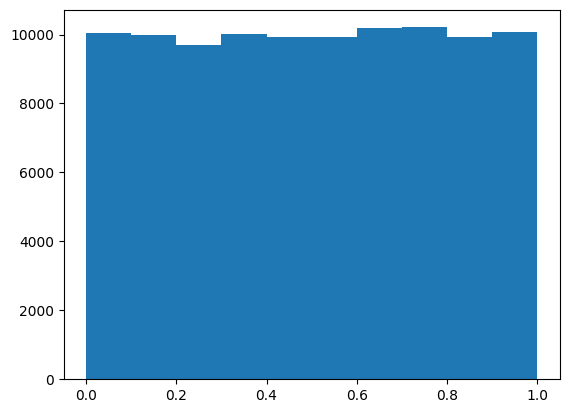

In [ ]:
plt.hist([rand() for _ in range(100_000)])

In [ ]:
%timeit -n 10 list(chunks([rand() for _ in range(7840)], 10))

5.81 ms ± 575 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
%timeit -n 10 torch.randn(784, 10)

The slowest run took 8.13 times longer than the fastest. This could mean that an intermediate result is being cached.
147 µs ± 149 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Matrix Multiplication

In [ ]:
torch.manual_seed(1)
weights = torch.randn(784, 10)
bias = torch.zeros(10)

In [ ]:
m1 = X_test[:5]
m2 = weights

In [ ]:
m1.shape, m2.shape

(torch.Size([5, 784]), torch.Size([784, 10]))

In [ ]:
ar, ac = m1.shape
br, bc = m2.shape
(ar, ac), (br, bc)

((5, 784), (784, 10))

In [ ]:
t1 = torch.zeros(ar, bc)
t1.shape

torch.Size([5, 10])

In [ ]:
for i in range(ar):
    for j in range(bc):
        for k in range(ac):
            t1[i, j] += m1[i, k] * m2[k, j]

In [ ]:
t1

tensor([[  8.2509, -32.2384, -31.2659,  29.6144,  37.1024, -10.6518, -18.7646,
          -9.3841,  13.5039,   3.1983],
        [ 15.3977, -19.5008,  -5.6448,  30.4349,  59.5697,   6.9771, -25.8890,
         -40.2893, -17.3914,  43.8492],
        [  7.8317,  -4.5760,   5.5933, -13.6489,  28.6691, -11.6068, -25.0293,
         -16.1800,   7.5447,  -6.0635],
        [  5.7755,  -7.0180,   5.6232, -14.6877,  40.6079,   4.7634, -18.4372,
         -18.1103,  -4.8335,  26.0490],
        [-10.4290, -20.8873, -15.5178,  11.3828,  39.0230, -28.5750, -34.5579,
          -0.3404,   8.5624,  -8.3245]])

In [ ]:
torch.set_printoptions(precision=2, linewidth=140, sci_mode=False)

In [ ]:
t1

tensor([[  8.25, -32.24, -31.27,  29.61,  37.10, -10.65, -18.76,  -9.38,  13.50,   3.20],
        [ 15.40, -19.50,  -5.64,  30.43,  59.57,   6.98, -25.89, -40.29, -17.39,  43.85],
        [  7.83,  -4.58,   5.59, -13.65,  28.67, -11.61, -25.03, -16.18,   7.54,  -6.06],
        [  5.78,  -7.02,   5.62, -14.69,  40.61,   4.76, -18.44, -18.11,  -4.83,  26.05],
        [-10.43, -20.89, -15.52,  11.38,  39.02, -28.58, -34.56,  -0.34,   8.56,  -8.32]])

In [ ]:
import numpy as np
np.set_printoptions(precision=2, linewidth=140)

In [ ]:
def matmul(a, b):
    (ar, ac), (br, bc) = a.shape, b.shape
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc):
            for k in range(ac):
                c[i, j] += a[i, k] * b[k, j]
    return c

In [ ]:
ar*bc*ac

39200

## Numba

In [ ]:
from numba import njit

In [ ]:
@njit
def dot(a, b):
    res = 0
    for i in range(len(a)):
        res += a[i] * b[i]
    return res

In [ ]:
from numpy import array

In [ ]:
%time dot(array([1., 2, 3]), array([2., 3, 4]))

CPU times: user 422 ms, sys: 114 ms, total: 536 ms
Wall time: 845 ms


20.0

In [ ]:
%time dot(array([1., 2, 3]), array([2., 3, 4]))

CPU times: user 36 µs, sys: 1 µs, total: 37 µs
Wall time: 42 µs


20.0

Now only two of our loops are running in python, not three:

In [ ]:
def matmul(a, b):
    (ar, ac), (br, bc) = a.shape, b.shape
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc):
            c[i, j] += dot(a[i, :], b[:, j])
    return c

In [ ]:
m1a, m2a = m1.numpy(), m2.numpy()

In [ ]:
from fastcore.test import *

In [ ]:
test_close(t1, matmul(m1a, m2a), eps=1e-4)

## Elementwise Ops

In [ ]:
a = tensor([10., 6, -4])
b = tensor([2., 8, 7])
a, b

(tensor([10.,  6., -4.]), tensor([2., 8., 7.]))

In [ ]:
a + b

tensor([12., 14.,  3.])

In [ ]:
(a < b).float().mean()

tensor(0.67)

In [ ]:
m = tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]]); m

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

Frobenius Norm

In [ ]:
sf = (m*m).sum()
sf

tensor(285)

In [ ]:
sf.sqrt()

tensor(16.88)

In [ ]:
m[2, :], m[:, 2]

(tensor([7, 8, 9]), tensor([3, 6, 9]))

In [ ]:
m[2]

tensor([7, 8, 9])

In [ ]:
def matmul(a, b):
    (ar, ac), (br, bc) = a.shape, b.shape
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc):
            c[i, j] = (a[i, :] * b[:, j]).sum()
    return c

In [ ]:
test_close(t1, matmul(m1, m2), eps=1e-4)

In [ ]:
%timeit -n 50 _=matmul(m1, m2)

1.15 ms ± 94.2 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)


In [ ]:
def matmul(a, b):
    (ar, ac), (br, bc) = a.shape, b.shape
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc):
            c[i, j] = torch.dot(a[i, :], b[:, j])
    return c

In [ ]:
test_close(t1, matmul(m1, m2), eps=1e-4)

In [ ]:
%timeit -n 50 _=matmul(m1, m2)

862 µs ± 167 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)


## Broadcasting

In [ ]:
a

tensor([10.,  6., -4.])

In [ ]:
a > 0

tensor([ True,  True, False])

In [ ]:
a + 1

tensor([11.,  7., -3.])

In [ ]:
m

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [ ]:
2 * m

tensor([[ 2,  4,  6],
        [ 8, 10, 12],
        [14, 16, 18]])

### Broadcasting a vector to matrix

In [ ]:
c = tensor([10, 20, 30]); c

tensor([10, 20, 30])

In [ ]:
m

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [ ]:
m.shape, c.shape

(torch.Size([3, 3]), torch.Size([3]))

In [ ]:
m + c

tensor([[11, 22, 33],
        [14, 25, 36],
        [17, 28, 39]])

In [ ]:
c + m

tensor([[11, 22, 33],
        [14, 25, 36],
        [17, 28, 39]])

In [ ]:
t = c.expand_as(m); t

tensor([[10, 20, 30],
        [10, 20, 30],
        [10, 20, 30]])

In [ ]:
t.storage()

 10
 20
 30
[torch.storage._TypedStorage(dtype=torch.int64, device=cpu) of size 3]

In [ ]:
t.stride(), t.shape 

((0, 1), torch.Size([3, 3]))

In [ ]:
c.unsqueeze(0), c[None, :]

(tensor([[10, 20, 30]]), tensor([[10, 20, 30]]))

In [ ]:
c.shape, c.unsqueeze(0).shape

(torch.Size([3]), torch.Size([1, 3]))

In [ ]:
c.shape, c.unsqueeze(1).shape

(torch.Size([3]), torch.Size([3, 1]))

In [ ]:
c[None].shape, c[..., None].shape

(torch.Size([1, 3]), torch.Size([3, 1]))

In [ ]:
c[:, None].expand_as(m)

tensor([[10, 10, 10],
        [20, 20, 20],
        [30, 30, 30]])

In [ ]:
m + c[:, None]

tensor([[11, 12, 13],
        [24, 25, 26],
        [37, 38, 39]])

In [ ]:
m + c[None, :]

tensor([[11, 22, 33],
        [14, 25, 36],
        [17, 28, 39]])

### Broadcasting rules

In [ ]:
c[None, :]

tensor([[10, 20, 30]])

In [ ]:
c[None, :].shape

torch.Size([1, 3])

In [ ]:
c[:, None]

tensor([[10],
        [20],
        [30]])

In [ ]:
c[:, None].shape

torch.Size([3, 1])

In [ ]:
c[:, None] * c[None, :]

tensor([[100, 200, 300],
        [200, 400, 600],
        [300, 600, 900]])

In [ ]:
c[None] > c[:, None]

tensor([[False,  True,  True],
        [False, False,  True],
        [False, False, False]])

### Matmul with broadcasting

In [ ]:
digit = m1[0]

In [ ]:
digit.shape, m2.shape

(torch.Size([784]), torch.Size([784, 10]))

In [ ]:
digit[:, None].shape

torch.Size([784, 1])

In [ ]:
digit[:, None].expand_as(m2).shape

torch.Size([784, 10])

In [ ]:
(digit[:, None] * m2).shape

torch.Size([784, 10])

In [ ]:
def matmul(a, b):
    (ar, ac), (br, bc) = a.shape, b.shape
    c = torch.zeros(ar, bc)
    for i in range(ar):
        c[i] = (a[i,:, None] * b).sum(dim=0)
    return c

In [ ]:
test_close(t1, matmul(m1, m2), eps=1e-4)

In [ ]:
%timeit -n 50 _=matmul(m1, m2)

288 µs ± 92.4 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)


In [ ]:
tr = matmul(X_train, weights)
tr

tensor([[ 16.25, -15.36, -25.81,  ..., -21.11, -26.31,  17.92],
        [  5.01,   0.29, -23.21,  ..., -14.26,  23.98,  24.13],
        [  5.70,  -3.06,  -9.48,  ...,  -9.08,  11.74,   0.88],
        ...,
        [-12.85,  -6.30,  -4.18,  ..., -22.07,  16.46,  -0.86],
        [ 13.19, -21.23, -10.63,  ...,  -9.95,  19.52,   3.76],
        [ -1.56,  -5.29,  -8.10,  ...,  -2.18,  -0.69,   1.49]])

In [ ]:
tr.shape

torch.Size([14979, 10])

In [ ]:
%time _=matmul(X_train, weights)

CPU times: user 442 ms, sys: 3.74 ms, total: 446 ms
Wall time: 449 ms


## Einstein Summation

Einstein Summation is a compact representation for combining products and sums in a general way. The key rules are:
- Repeating letters between input arrays means that values along those axes will be multiplied together.
- Omitting a letter from the output means that values along that axis will be summed

In [ ]:
m1.shape, m2.shape

(torch.Size([5, 784]), torch.Size([784, 10]))

In [ ]:
mr = torch.einsum('ik,kj->ikj', m1, m2)
mr.shape

torch.Size([5, 784, 10])

In [ ]:
mr.sum(1)

tensor([[  8.25, -32.24, -31.27,  29.61,  37.10, -10.65, -18.76,  -9.38,  13.50,   3.20],
        [ 15.40, -19.50,  -5.64,  30.43,  59.57,   6.98, -25.89, -40.29, -17.39,  43.85],
        [  7.83,  -4.58,   5.59, -13.65,  28.67, -11.61, -25.03, -16.18,   7.54,  -6.06],
        [  5.78,  -7.02,   5.62, -14.69,  40.61,   4.76, -18.44, -18.11,  -4.83,  26.05],
        [-10.43, -20.89, -15.52,  11.38,  39.02, -28.58, -34.56,  -0.34,   8.56,  -8.32]])

In [ ]:
torch.einsum('ik,kj->ij', m1,m2)

tensor([[  8.25, -32.24, -31.27,  29.61,  37.10, -10.65, -18.76,  -9.38,  13.50,   3.20],
        [ 15.40, -19.50,  -5.64,  30.43,  59.57,   6.98, -25.89, -40.29, -17.39,  43.85],
        [  7.83,  -4.58,   5.59, -13.65,  28.67, -11.61, -25.03, -16.18,   7.54,  -6.06],
        [  5.78,  -7.02,   5.62, -14.69,  40.61,   4.76, -18.44, -18.11,  -4.83,  26.05],
        [-10.43, -20.89, -15.52,  11.38,  39.02, -28.58, -34.56,  -0.34,   8.56,  -8.32]])

In [ ]:
def matmul(a, b): return torch.einsum('ik,kj->ij', a, b)

In [ ]:
test_close(tr, matmul(X_train, weights), eps=1e-4)

In [ ]:
%timeit -n 5 _=matmul(X_train, weights)

9.26 ms ± 899 µs per loop (mean ± std. dev. of 7 runs, 5 loops each)


### pytorch op

We can use pytorch's function or operator directly for matrix multiplication

In [ ]:
test_close(tr, X_train@weights, eps=1e-3)

In [ ]:
%timeit -n 5 _=torch.matmul(X_train, weights)

9.01 ms ± 470 µs per loop (mean ± std. dev. of 7 runs, 5 loops each)


In [ ]:
%timeit -n 5 _=X_train@weights

9.47 ms ± 1.49 ms per loop (mean ± std. dev. of 7 runs, 5 loops each)


## CUDA

In [ ]:
def matmul(grid, a, b, c):
    i, j = grid
    if i < c.shape[0] and j < c.shape[1]:
        tmp = 0.
        for k in range(a.shape[1]): tmp += a[i, k] * b[k, j]
        c[i, j] = tmp

In [ ]:
res = torch.zeros(ar, bc)
matmul((0, 0), m1, m2, res)
res

tensor([[8.25, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
        [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
        [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
        [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
        [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00]])

In [ ]:
def launch_kernel(kernel, grid_x, grid_y, *args, **kwargs):
    for i in range(grid_x):
        for j in range(grid_y): kernel((i, j), *args, **kwargs)

In [ ]:
res = torch.zeros(ar, bc)
launch_kernel(matmul, ar, bc, m1, m2, res)
res

tensor([[  8.25, -32.24, -31.27,  29.61,  37.10, -10.65, -18.76,  -9.38,  13.50,   3.20],
        [ 15.40, -19.50,  -5.64,  30.43,  59.57,   6.98, -25.89, -40.29, -17.39,  43.85],
        [  7.83,  -4.58,   5.59, -13.65,  28.67, -11.61, -25.03, -16.18,   7.54,  -6.06],
        [  5.78,  -7.02,   5.62, -14.69,  40.61,   4.76, -18.44, -18.11,  -4.83,  26.05],
        [-10.43, -20.89, -15.52,  11.38,  39.02, -28.58, -34.56,  -0.34,   8.56,  -8.32]])

In [ ]:
!export NUMBA_ENABLE_CUDASIM=1 # to enable cuda based simulator

In [ ]:
from numba import cuda

In [ ]:
@cuda.jit
def matmul(a, b):
    i, j = cuda.grid(2)
    if i < c.shape[0] and j < c.shape[1]:
        tmp = 0.
        for k in range(a.shape[1]): tmp += a[i, k] * b[k, j]
        c[i, j] = tmp

In [ ]:
r = np.zeros(tr.shape)
m1g,m2g,rg = cuda.to_device(X_train), cuda.to_device(weights), cuda.to_device(r)

CudaSupportError: Error at driver init: 

CUDA driver library cannot be found.
If you are sure that a CUDA driver is installed,
try setting environment variable NUMBA_CUDA_DRIVER
with the file path of the CUDA driver shared library.
:

In [ ]:
cuda.is_available()

False